In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
 data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


**Visualize the Target Variable Distribution**

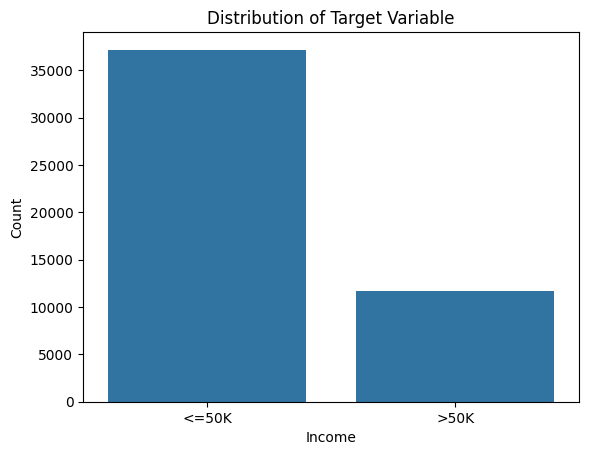

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='income', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


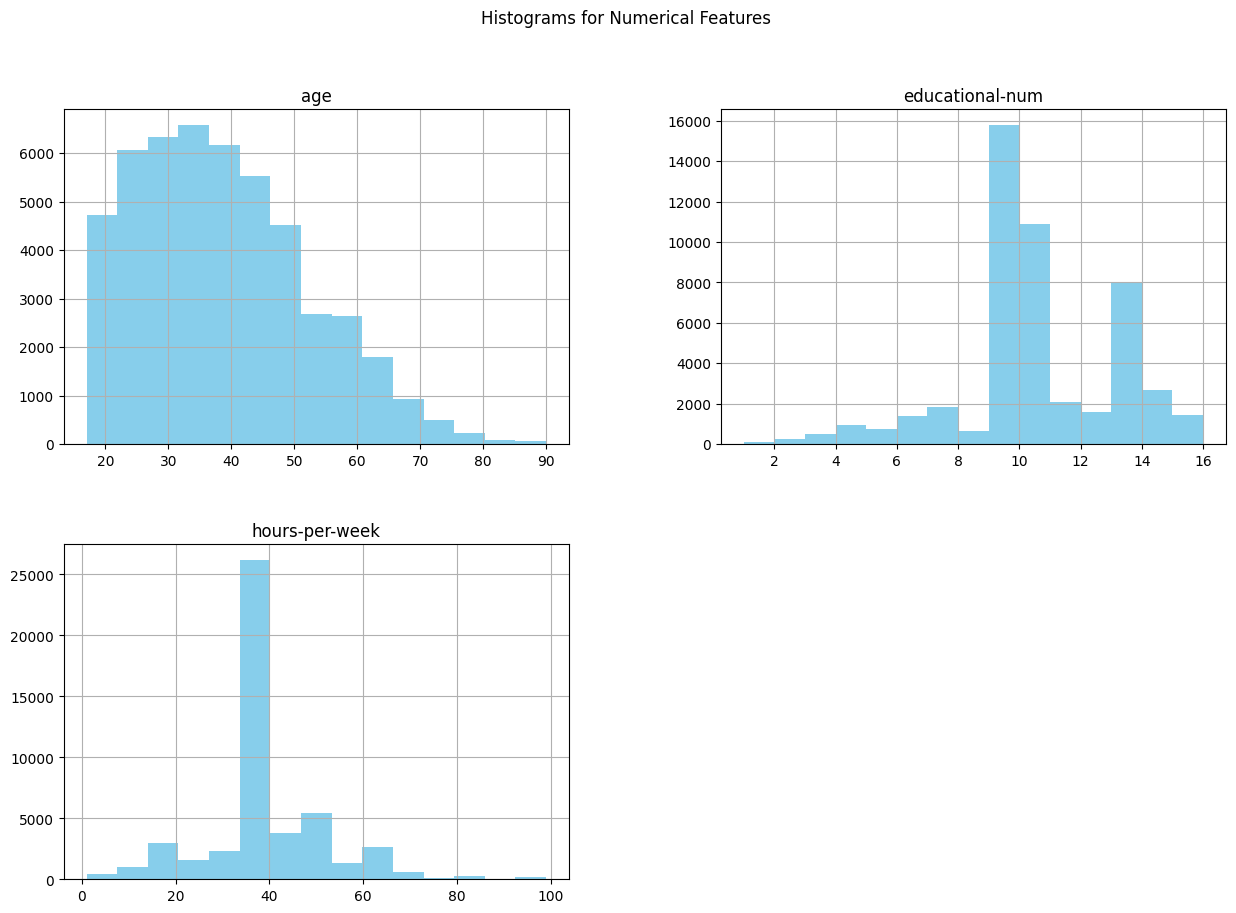

In [ ]:
# Histograms for numerical features
numerical_features = ['age', 'educational-num',  'hours-per-week']
data[numerical_features].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle('Histograms for Numerical Features')
plt.show()






Education 	Education-num
* Preschool	1
* 1st-4th	2
* 5th-6th	3
* 7th-8th	4
* 9th	5
* 10th	6
* 11th	7
* 12th	8
* HS-grad (High School)	9
* Some-college	10
* Associates-acdm	11
* Associates-voc	12
* Bachelors	13
* Masters	14
* Doctorate	16
* Prof-school (Professional school)	15





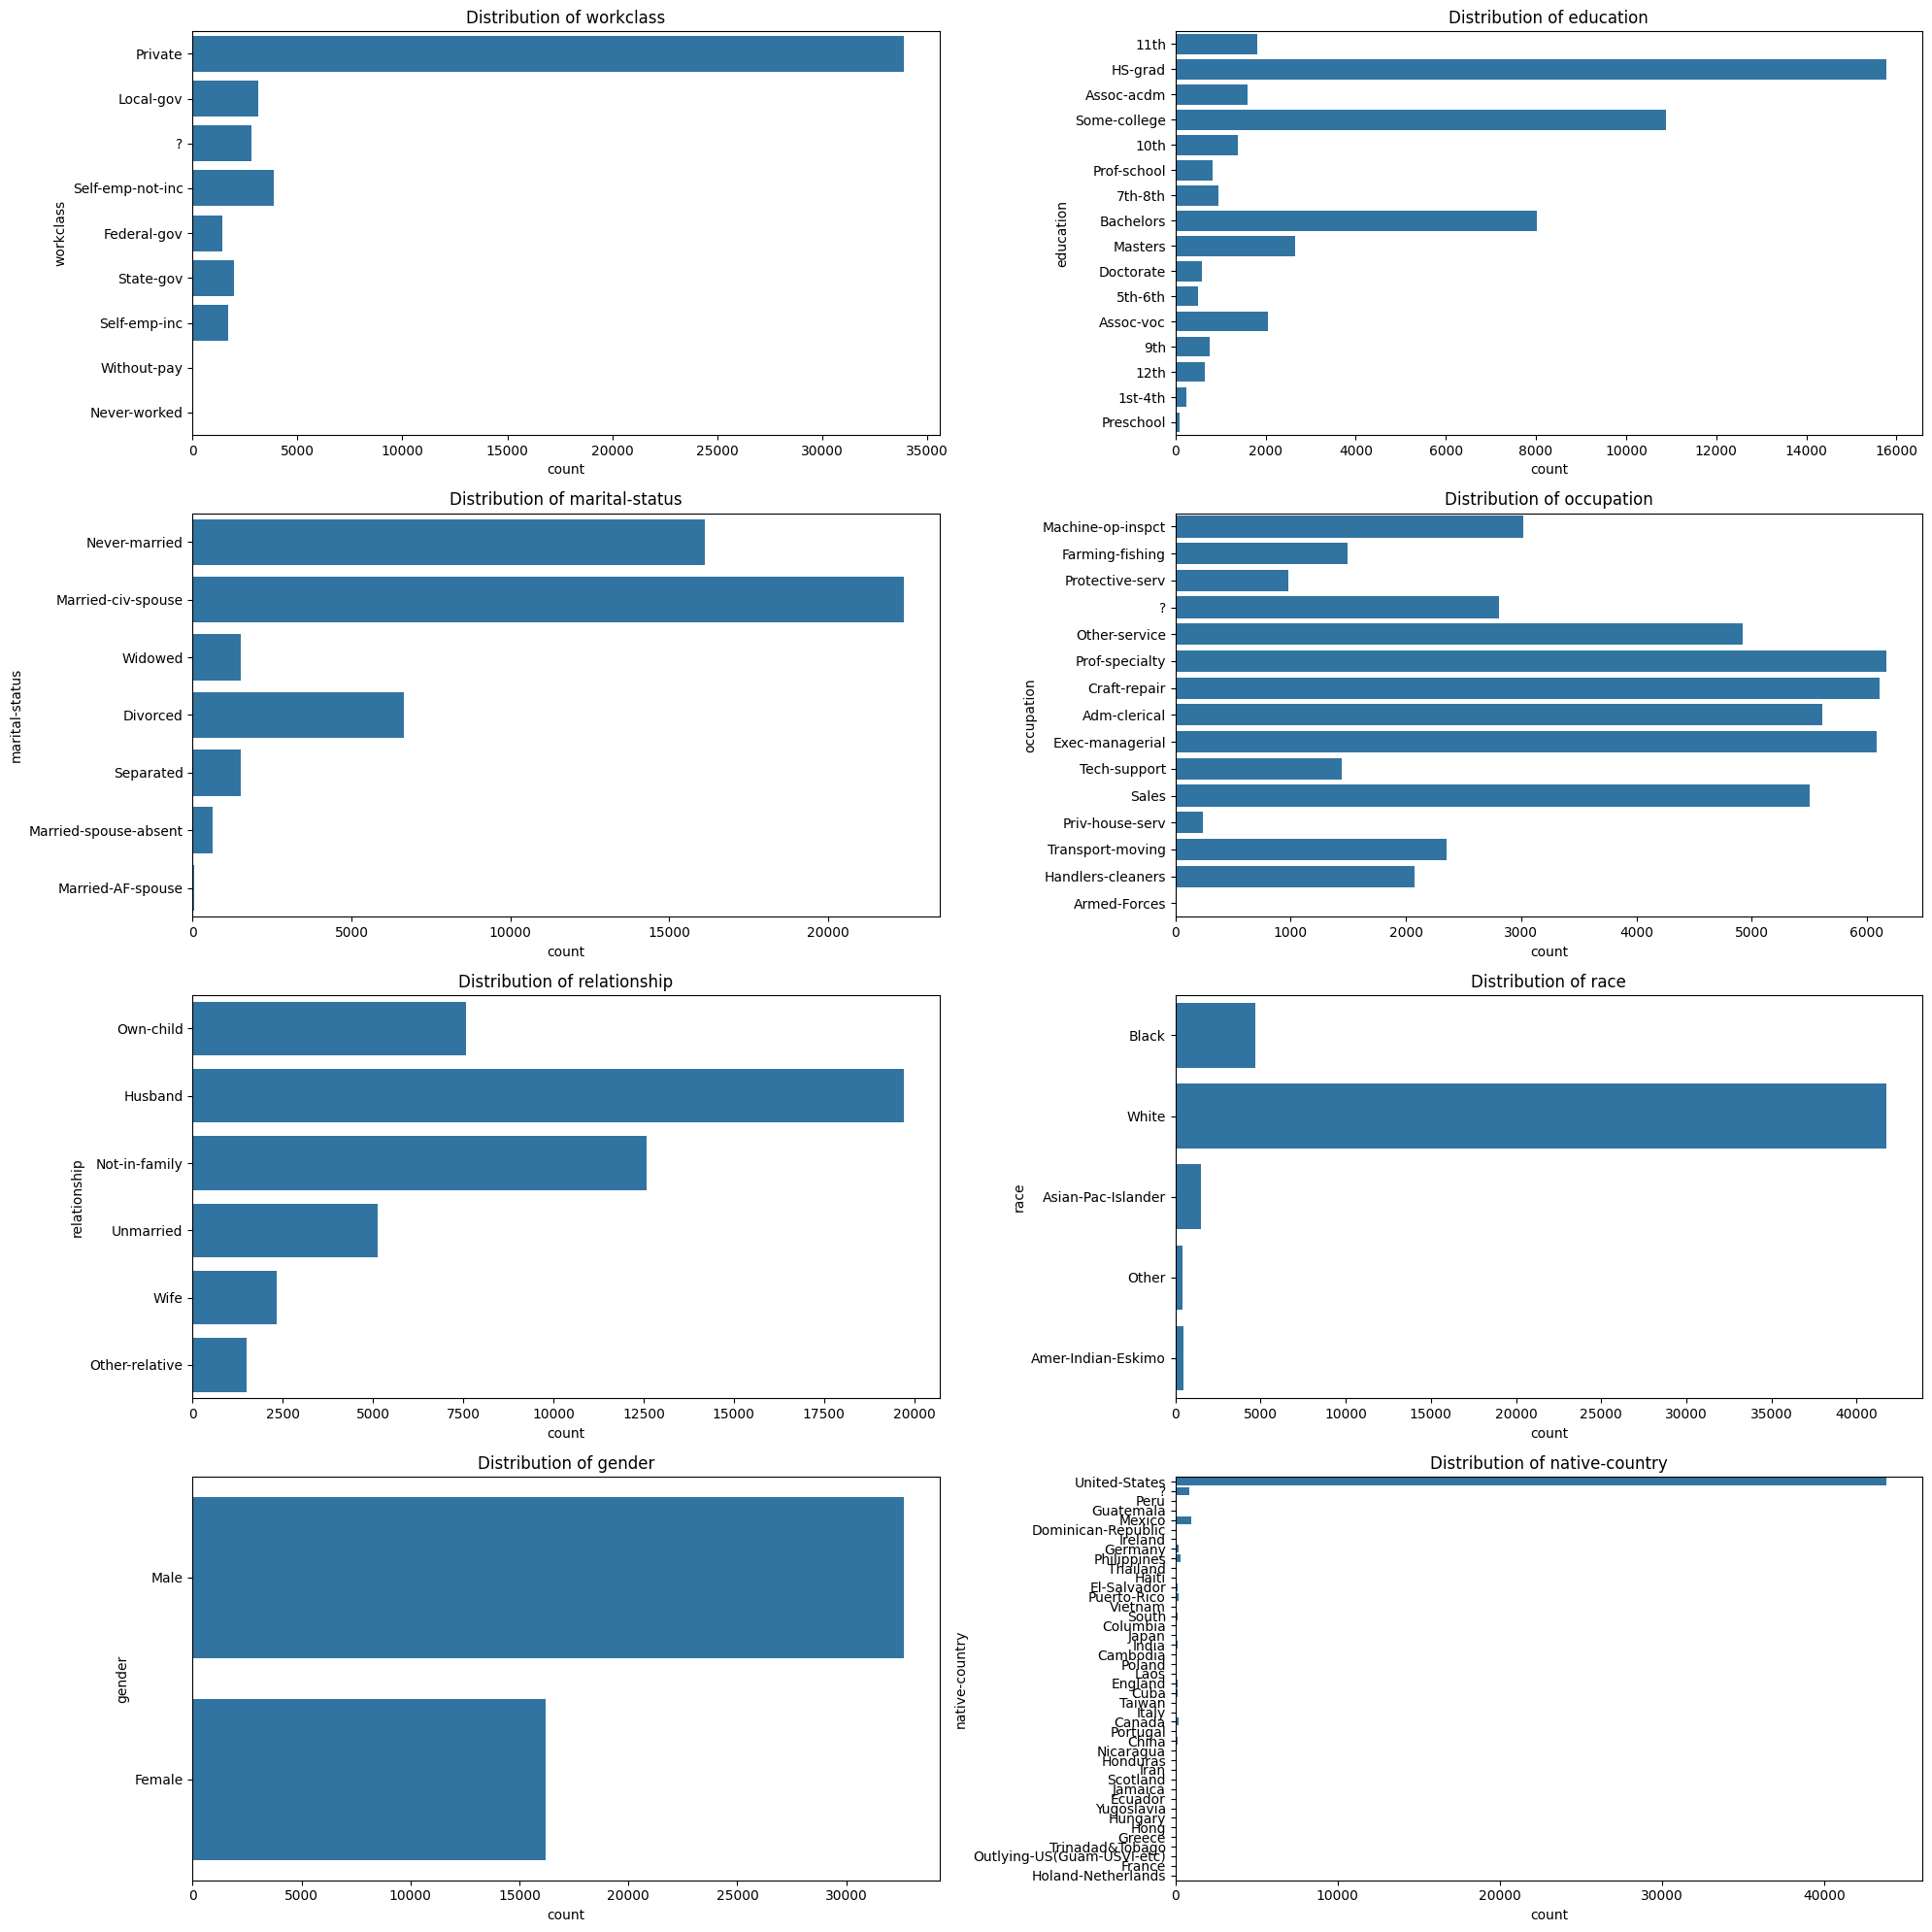

In [ ]:
# Countplots for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=data, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

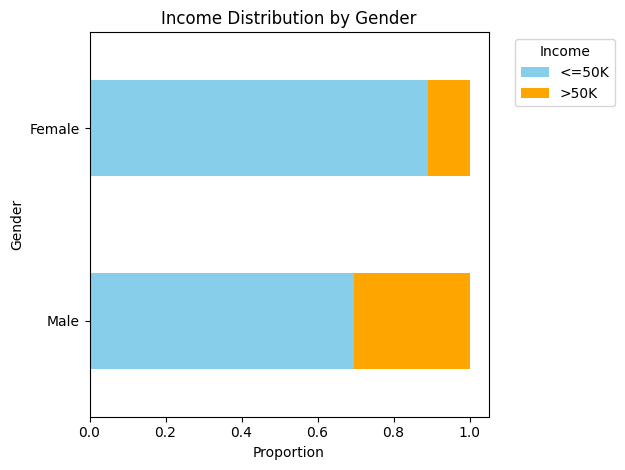

In [ ]:
# gender Vs income
income_distribution = data.groupby('gender')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(8, 5))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Gender')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

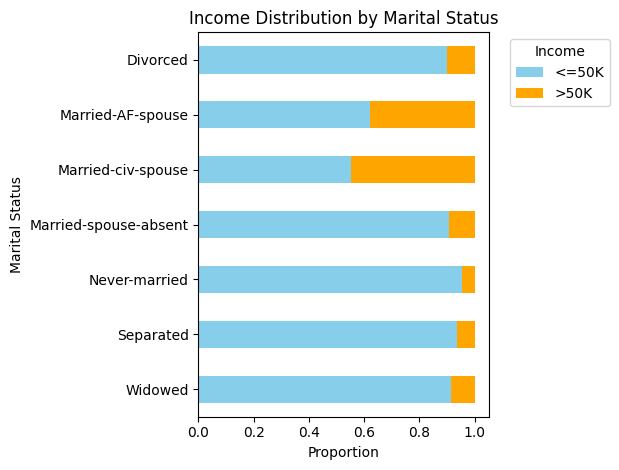

In [ ]:
# marital-status Vs income
income_distribution = data.groupby('marital-status')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

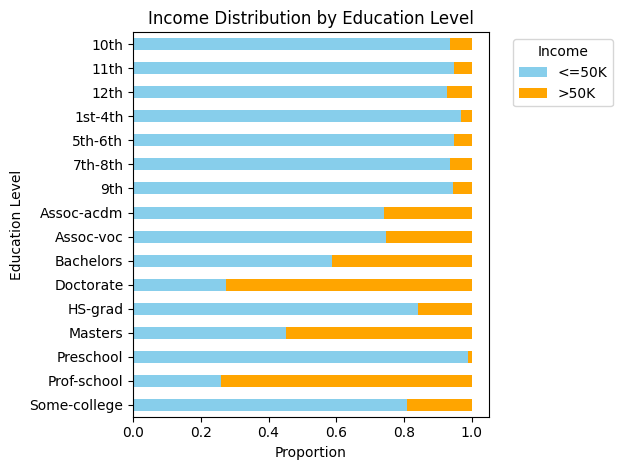

In [ ]:
# Plot Income Distribution by Education level
income_distribution = data.groupby('education')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Education Level')
plt.title('Income Distribution by Education Level')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

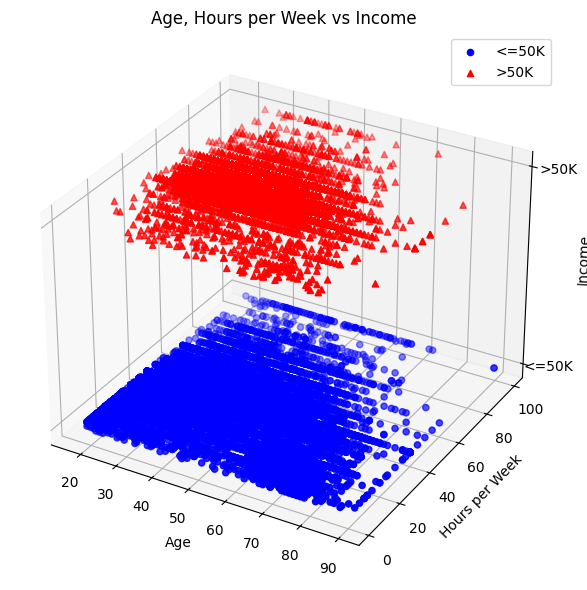

In [ ]:
# age, hours-per-week Vs income
data = data[['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']]
data['income_numeric'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
fig = plt.figure(figsize=(25, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[data['income_numeric'] == 0]['age'],
           data[data['income_numeric'] == 0]['hours-per-week'],
           data[data['income_numeric'] == 0]['income_numeric'],
           c='b', marker='o', label='<=50K')
ax.scatter(data[data['income_numeric'] == 1]['age'],
           data[data['income_numeric'] == 1]['hours-per-week'],
           data[data['income_numeric'] == 1]['income_numeric'],
           c='r', marker='^', label='>50K')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per Week')
ax.set_zlabel('Income')
ax.set_title('Age, Hours per Week vs Income')
ax.set_zticks([0, 1])
ax.set_zticklabels(['<=50K', '>50K'])
ax.legend()
plt.tight_layout()
plt.show()

In [3]:
# Replace missing values in categorical features with mode
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0], inplace=True)


<ipython-input-3-850ac5cd9051>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Encoding Categorical Variables
Use one-hot encoding for models like logistic regression or neural networks.
Use label encoding for tree-based models like Random Fores

In [5]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country']

# Use pandas' get_dummies for simplicity
data_onehot = pd.get_dummies(data, columns=cat_cols, drop_first=True)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding for categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for future use


In [8]:
from sklearn.preprocessing import StandardScaler

# Numerical columns
num_cols = ['age', 'fnlwgt', 'education', 'capital-gain', 'capital-loss', 'hours-per-week']

# Standardize numerical features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


. Feature Engineering

> Create age bins: Group individuals into age categories (e.g., young, middle-aged, senior).





In [9]:
# Create age bins
data['age_bin'] = pd.cut(data['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])


In [11]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('income', axis=1)
y = data['income']

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check splits
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Training set: (29305, 15)
Validation set: (9768, 15)
Test set: (9769, 15)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode all categorical columns including `age_bin`
cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'native-country', 'age_bin']

label_encoders = {}
for col in cat_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_val[col] = le.transform(X_val[col])  # Transform validation set
        X_test[col] = le.transform(X_test[col])  # Transform test set
        label_encoders[col] = le  # Store encoders for later use




# **MACHINE LEARNING**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


# RANDOM FOREST

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # Maximum depth of each tree; can also be tuned
    random_state=42,    # Ensures reproducibility
    class_weight='balanced',  # Adjust for class imbalance if needed
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)                 # Predicted classes
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]     # Predicted probabilities

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_y_prob))
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

# Optional: Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))



Accuracy: 0.8582249974408844
ROC AUC Score: 0.9060626656025281

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7431
        >50K       0.76      0.60      0.67      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769


Confusion Matrix:
[[6977  454]
 [ 931 1407]]


LOGESTIC REGRISSION

In [21]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and Probabilities for Validation Set
val_preds = log_reg.predict(X_val)
val_probs = log_reg.predict_proba(X_val)[:, 1]

# Evaluate the Model
print("Classification Report (Validation):\n")
print(classification_report(y_val, val_preds))

# Accuracy
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# AUC-ROC
auc_score = roc_auc_score(y_val, val_probs)
print(f"AUC-ROC: {auc_score:.2f}")


Classification Report (Validation):

              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.89      7431
        >50K       0.73      0.45      0.56      2337

    accuracy                           0.83      9768
   macro avg       0.79      0.70      0.73      9768
weighted avg       0.82      0.83      0.81      9768

Validation Accuracy: 0.83
AUC-ROC: 0.85


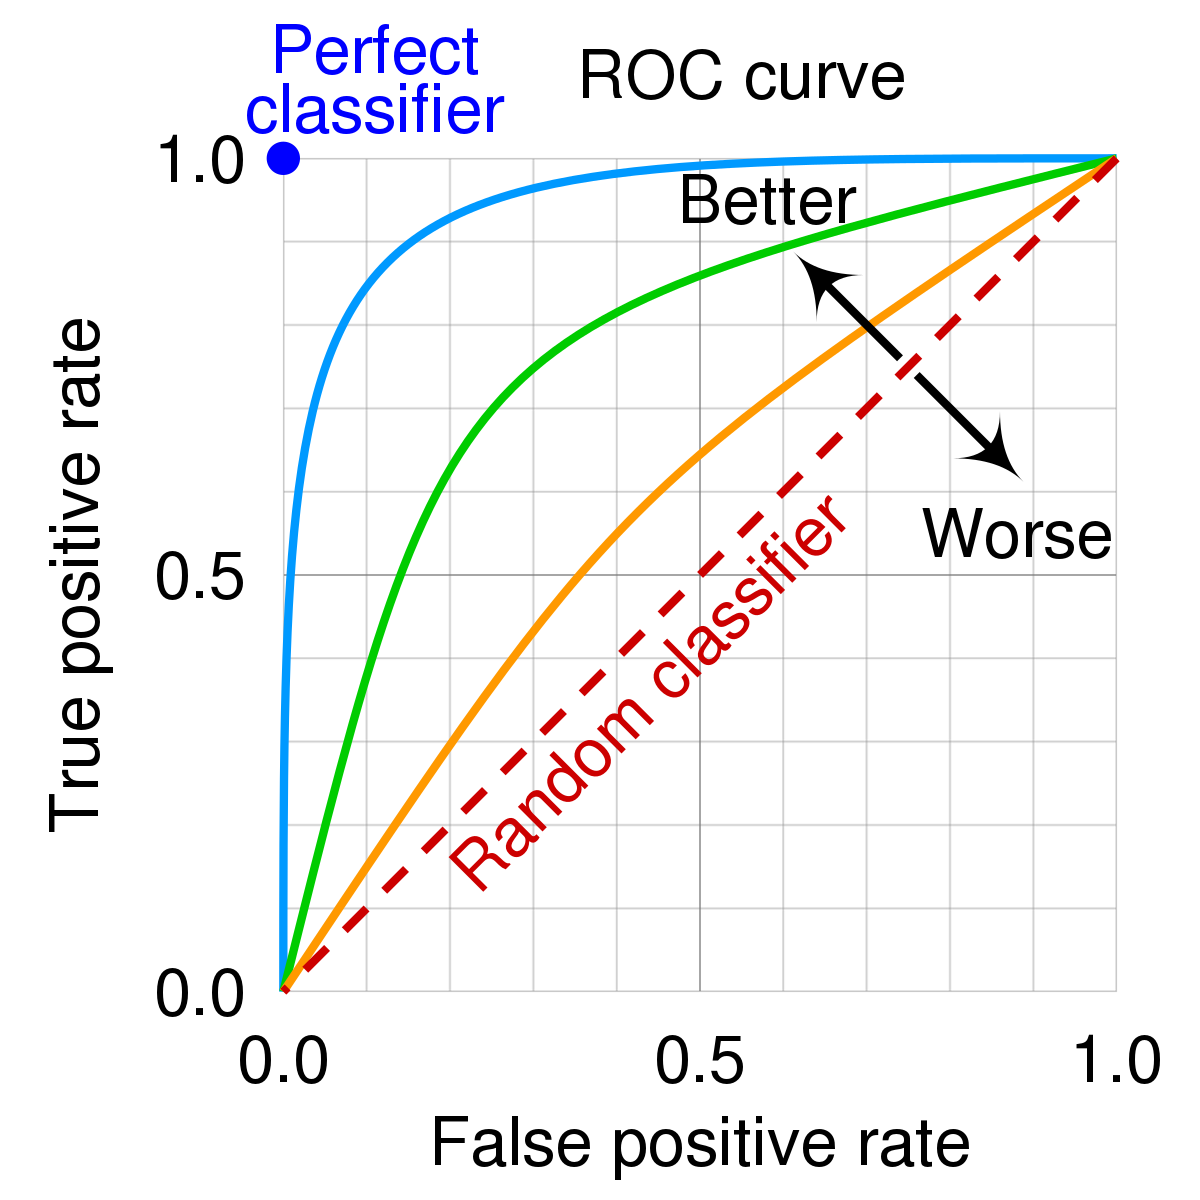

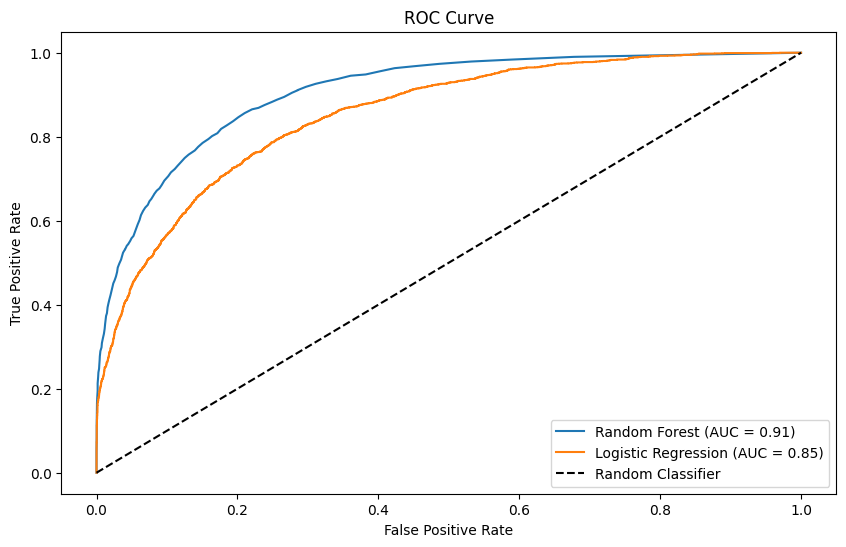

In [22]:
import matplotlib.pyplot as plt

# رسم منحنى ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob, pos_label='>50K')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_prob, pos_label='>50K')

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_y_prob)))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, lr_y_prob)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# **NEURAL NETWORK**

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8055 - loss: 0.4198 - val_accuracy: 0.8546 - val_loss: 0.3141
Epoch 2/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8504 - loss: 0.3271 - val_accuracy: 0.8578 - val_loss: 0.3074
Epoch 3/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8544 - loss: 0.3189 - val_accuracy: 0.8619 - val_loss: 0.3026
Epoch 4/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8514 - loss: 0.3183 - val_accuracy: 0.8607 - val_loss: 0.3043
Epoch 5/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 0.3121 - val_accuracy: 0.8610 - val_loss: 0.3053
Epoch 6/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8579 - loss: 0.3137 - val_accuracy: 0.8610 - val_loss: 0.3057
Epoch 7/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8596 - loss: 0.3037 - val_accuracy: 0.8632 - val_loss: 0.3050
Epoch 8/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8651 - loss: 0.2994 - val_accuracy: 0.8612 - val_

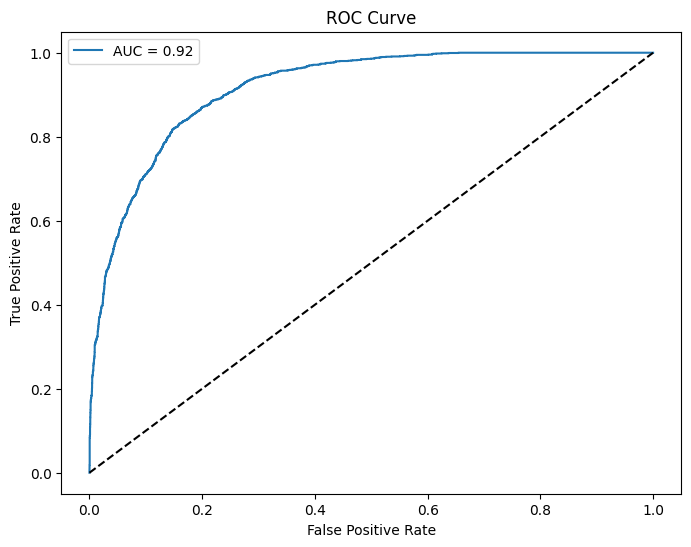

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4944
           1       0.73      0.62      0.67      1569

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Test AUC-ROC: 0.91


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# One-hot encode categorical features
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize numerical features
scaler = StandardScaler()
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Build Neural Network Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Evaluate on Validation Set
val_preds = (model.predict(X_val) > 0.5).astype(int)
val_probs = model.predict(X_val).flatten()

print("Classification Report (Validation):\n")
print(classification_report(y_val, val_preds))

# AUC-ROC
auc_score = roc_auc_score(y_val, val_probs)
print(f"AUC-ROC: {auc_score:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, val_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Evaluate on Test Set
test_preds = (model.predict(X_test) > 0.5).astype(int)
test_probs = model.predict(X_test).flatten()
test_auc = roc_auc_score(y_test, test_probs)
print("Classification Report (Test):\n")
print(classification_report(y_test, test_preds))
print(f"Test AUC-ROC: {test_auc:.2f}")


#  Hyperparameter Tuning with Keras-Tuner

In [33]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer

    # Tune the number of hidden layers
    for i in range(hp.Int("num_layers", 1, 3)):  # 1 to 3 hidden layers
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
        model.add(layers.Dropout(hp.Float(f"dropout_{i}", 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation="sigmoid"))

    # Tune the learning rate
    lr = hp.Choice("learning_rate", [0.001, 0.01, 0.1])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=20,
    factor=3,
    directory="my_dir",
    project_name="income_prediction",
)

# Callback to stop early if validation accuracy doesn't improve
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

# Run the tuner
tuner.search(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[stop_early],
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Number of Layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get("num_layers")):
    print(f"Units in Layer {i}: {best_hps.get(f'units_{i}')}")
    print(f"Dropout in Layer {i}: {best_hps.get(f'dropout_{i}')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
batch_size = best_hps.get("batch_size") if "batch_size" in best_hps.values else 32

history = best_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=batch_size,
    callbacks=[stop_early],
)
# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Reloading Tuner from my_dir/income_prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 2
Units in Layer 0: 288
Dropout in Layer 0: 0.4
Units in Layer 1: 480
Dropout in Layer 1: 0.30000000000000004
Learning Rate: 0.001
Epoch 1/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8277 - loss: 0.3649 - val_accuracy: 0.8550 - val_loss: 0.3097
Epoch 2/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8502 - loss: 0.3155 - val_accuracy: 0.8584 - val_loss: 0.3063
Epoch 3/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8543 - loss: 0.3136 - val_accuracy: 0.8616 - val_loss: 0.3058
Epoch 4/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8575 - loss: 0.3081 - val_accuracy: 0.8586 - val_loss: 0.3051
Epoch 5/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8602 - loss: 0.3020 - val_accuracy: 0.8595 - val_loss: 0.3031
Epoch 6/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8587 - loss: 0.3035 - val_accuracy: 0.8623 - val_loss: 0.3068
E